# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
# !pip install rasterio
# !pip install tensorflow_addons
# !pip install datasets
# !pip install transformers
#!pip install tensorflow
#!pip install protobuf==3.20.*
import tensorflow as tf
import rasterio as rio
import pandas as pd
from rasterio.plot import show
from sklearn import cluster
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense,Flatten #1 DIM
import numpy as np
from keras.layers import Conv2D, BatchNormalization,Activation #IMAGES ARE 2 DIM
from keras.models import Model
import matplotlib.pyplot as plt
import glob
import re
from skimage.io import imread, imshow
import tifffile as tiff
import cv2
import scipy.io
from itertools import chain
import pickle
import os
from osgeo import gdal
from keras.preprocessing import image
from tqdm import tqdm
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.core import Dense,Flatten
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import imageio
from rasterio.plot import show
from sklearn import cluster
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import datasets
from transformers import ViTFeatureExtractor
from huggingface_hub import HfFolder
from transformers import TFViTModel
from transformers import TFViTForImageClassification, create_optimizer
from transformers import DefaultDataCollator
from transformers.keras_callbacks import PushToHubCallback
from tensorflow.keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping
import glob
import gdal
import tensorflow as tf
from PIL import Image
from keras.preprocessing import image
import numpy

In [3]:
#!pip install opencv-python
#!pip install osgeo

In [4]:
df=pd.read_csv('Label_CSV_All_Municipality.csv')
df

,Unnamed: 0,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label
0,0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable
1,1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased
2,2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased
3,3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable
4,4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable
...,...,...,...,...,...,...,...,...,...,...
160519,160519,2018/w48,0,99773,Cumaribo,0,No Change,0,Stable,Stable
160520,160520,2018/w49,0,99773,Cumaribo,0,No Change,0,Stable,Stable
160521,160521,2018/w50,0,99773,Cumaribo,0,No Change,0,Stable,Stable
160522,160522,2018/w51,0,99773,Cumaribo,0,No Change,0,Stable,Stable


In [5]:
#print([name for name in os.listdir("/data0") if os.path.isdir(name)])

In [6]:
folders=[]
folders = [f for f in sorted(os.listdir('Dataset_10_best_cities'))]
folders
folders.pop(0)
folders

['23001',
 '41001',
 '50001',
 '5001',
 '5360',
 '54001',
 '68001',
 '73001',
 '76001',
 '8001']

# Creating the JPG images in the respective folders

In [57]:
for k in range(len(folders)):
    list1=[]
    for filepath in glob.iglob('Dataset_10_best_cities/'+folders[k]+'/*.tiff'):
        list1.append(filepath)
    #print(len(list1))
    string=list1[0]
    val=len(str(folders[k]))
    #print(val)
    #print(string[0:41+val])
    for i in range(0,len(list1)):
        options_list = [
            '-ot Byte',
            '-of JPEG',
            '-b 1',
            '-scale'
        ]           
        options_string = " ".join(options_list)
        
        string=list1[i]
        
        gdal.Translate(
            string[0:41+val]+'jpg',
            string,
            options=options_string
        ) 

# Reading the CSV with data for all municipalities

In [7]:
folders=[]
folders = [f for f in sorted(os.listdir('Dataset_10_best_cities'))]
folders
folders.pop(0)
folders

['23001',
 '41001',
 '50001',
 '5001',
 '5360',
 '54001',
 '68001',
 '73001',
 '76001',
 '8001']

# Adding a new column for TIFF images

In [8]:
df=pd.read_csv('Label_CSV_All_Municipality.csv')
df
df["TIFF Image Name"]=np.NaN
df

,Unnamed: 0,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name
0,0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,NaN
1,1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,NaN
2,2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,NaN
3,3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,NaN
4,4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,NaN
...,...,...,...,...,...,...,...,...,...,...,...
160519,160519,2018/w48,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN
160520,160520,2018/w49,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN
160521,160521,2018/w50,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN
160522,160522,2018/w51,0,99773,Cumaribo,0,No Change,0,Stable,Stable,NaN


# Adding Tiff images' name in the column

In [9]:
for k in range(len(folders)):
    list1=[]
    for filepath in glob.iglob('Dataset_10_best_cities/'+folders[k]+'/*.tiff'):
        list1.append(filepath)
    list2=sorted(list1)
    #print(list2)
    df_image_name = pd.DataFrame(list2) 
    df_image_name[0] = df_image_name[0].str.replace('Dataset_10_best_cities/'+folders[k]+'/', '')
    list_image=[]
    list_image=df_image_name[0].tolist()
    #print(list_image)
    #print(folders[k])
    #print(list_image)
    #print(list_image[0])
    for i in range(160524):
        if str(df.iat[i,3])==folders[k]:
            for j in range(len(list_image)):
                df.iloc[i+j,10]=list_image[j]
            break

            
df.tail(101000)
dff=df.dropna()
dff
dff = dff.drop('Unnamed: 0', 1)
dff=dff.reset_index()
dff=dff.drop('index',1)
dff

/tmp/ipykernel_149958/3898210675.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dff = dff.drop('Unnamed: 0', 1)
/tmp/ipykernel_149958/3898210675.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dff=dff.drop('index',1)


,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff
...,...,...,...,...,...,...,...,...,...,...
1555,2018/w48,25,76001,Cali,2,Increased,2,Stable,Stable,image_2018-11-25.tiff
1556,2018/w49,21,76001,Cali,-4,Decreased,4,Stable,Stable,image_2018-12-02.tiff
1557,2018/w50,36,76001,Cali,15,Increased,15,Stable,Stable,image_2018-12-09.tiff
1558,2018/w51,20,76001,Cali,-16,Decreased,16,Stable,Stable,image_2018-12-16.tiff


# Creating numeric labels for the images

In [10]:
#dff.reset_index()
merged_df=dff
list_numlabel=[]
for i in range(0,dff.shape[0]):
    if (merged_df.iat[i,8]=='Stable'):
        list_numlabel.append('1')
    elif(merged_df.iat[i,8]=='Increased'):
        list_numlabel.append('2')
    elif(merged_df.iat[i,8]=='Decreased'):
        list_numlabel.append('3')
#list_numlabel

df_numeric_label = pd.DataFrame(list_numlabel)
df_numeric_label

merged_df= pd.concat([merged_df, df_numeric_label],axis=1)
merged_df.columns = ['epiweek','Cases','Municipality code','Municipality','cases_differences','cases_intensity','cases_diff_abs','Stability Label','final_cases_label','TIFF Image Name','Numeric Label']
merged_df

list_stable_column=[]
list_increased_column =[]
list_decreased_column = []
for i in range(0,dff.shape[0]):
    if (merged_df.iat[i,8]=='Stable'):
        list_stable_column.append('1')
        list_increased_column.append('0')
        list_decreased_column.append('0')
    elif(merged_df.iat[i,8]=='Increased'):
        list_stable_column.append('0')
        list_increased_column.append('1')
        list_decreased_column.append('0')
    elif(merged_df.iat[i,8]=='Decreased'):
        list_stable_column.append('0')
        list_increased_column.append('0')
        list_decreased_column.append('1')


df_stable_column = pd.DataFrame(list_stable_column)
df_increased_column = pd.DataFrame(list_increased_column)
df_decreased_column = pd.DataFrame(list_decreased_column)

merged_df= pd.concat([merged_df, df_stable_column,df_increased_column,df_decreased_column],axis=1)
merged_df.columns = ['epiweek','Cases','Municipality code','Municipality','cases_differences','cases_intensity','cases_diff_abs','Stability Label','final_cases_label','TIFF Image Name','Numeric Label','Stable','Increased','Decreased']
merged_df #we get one-hot encoded column for the labels

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name,Numeric Label,Stable,Increased,Decreased
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff,1,1,0,0
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff,2,0,1,0
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff,3,0,0,1
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff,1,1,0,0
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018/w48,25,76001,Cali,2,Increased,2,Stable,Stable,image_2018-11-25.tiff,1,1,0,0
1556,2018/w49,21,76001,Cali,-4,Decreased,4,Stable,Stable,image_2018-12-02.tiff,1,1,0,0
1557,2018/w50,36,76001,Cali,15,Increased,15,Stable,Stable,image_2018-12-09.tiff,1,1,0,0
1558,2018/w51,20,76001,Cali,-16,Decreased,16,Stable,Stable,image_2018-12-16.tiff,1,1,0,0


# Adding JPG image name in the dataframe

In [11]:
merged_df["JPG Image Name"]=np.NaN
merged_df


for k in range(len(folders)):
    list1=[]
    for filepath in glob.iglob('Dataset_10_best_cities/'+folders[k]+'/*.jpg'):
        list1.append(filepath)
    #print(list1)
    jpg_image_name=[]
    for i in range(0,len(list1)):
        string=list1[i]
        val=len(str(folders[k]))
        #print(val)
        string=string[24+val:44+val]
        #string=string[136+val:156+val]
        jpg_image_name.append(string)
        #print(string)
    jpg_image_name.sort()
    #print(jpg_image_name[0])
#     #for 
    for j in range(160524):
        if str(merged_df.iat[j,2])==folders[k]:
            for l in range(len(jpg_image_name)):
                merged_df.iloc[j+l,14]=jpg_image_name[l]
            break
    #print(len(jpg_image_name))
       
merged_df

#A_sorted = df.sort_values(["A", "B"], ascending=True)

#merged_df=merged_df.sort_values([])

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label,TIFF Image Name,Numeric Label,Stable,Increased,Decreased,JPG Image Name
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable,image_2016-01-03.tiff,1,1,0,0,image_2016-01-03.jpg
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased,image_2016-01-10.tiff,2,0,1,0,image_2016-01-10.jpg
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased,image_2016-01-17.tiff,3,0,0,1,image_2016-01-17.jpg
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable,image_2016-01-24.tiff,1,1,0,0,image_2016-01-24.jpg
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable,image_2016-01-31.tiff,1,1,0,0,image_2016-01-31.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2018/w48,25,76001,Cali,2,Increased,2,Stable,Stable,image_2018-11-25.tiff,1,1,0,0,image_2018-11-25.jpg
1556,2018/w49,21,76001,Cali,-4,Decreased,4,Stable,Stable,image_2018-12-02.tiff,1,1,0,0,image_2018-12-02.jpg
1557,2018/w50,36,76001,Cali,15,Increased,15,Stable,Stable,image_2018-12-09.tiff,1,1,0,0,image_2018-12-09.jpg
1558,2018/w51,20,76001,Cali,-16,Decreased,16,Stable,Stable,image_2018-12-16.tiff,1,1,0,0,image_2018-12-16.jpg


In [12]:
merged_df.to_csv("Merged_df_label.csv")

# This many images we have for each labels

In [51]:
increased_case=0
decreased_case=0
stable_case=0
for i in range(merged_df.shape[0]):
    if str(merged_df.iat[i,8])=="Increased":
        increased_case=increased_case+1
    if str(merged_df.iat[i,8])=="Decreased":
        decreased_case=decreased_case+1
    if str(merged_df.iat[i,8])=="Stable":
        stable_case=stable_case+1

print("Increased case:", increased_case)
print("Decreased case:", decreased_case)
print("Stable case:", stable_case)

Increased case: 234
Decreased case: 236
Stable case: 1090


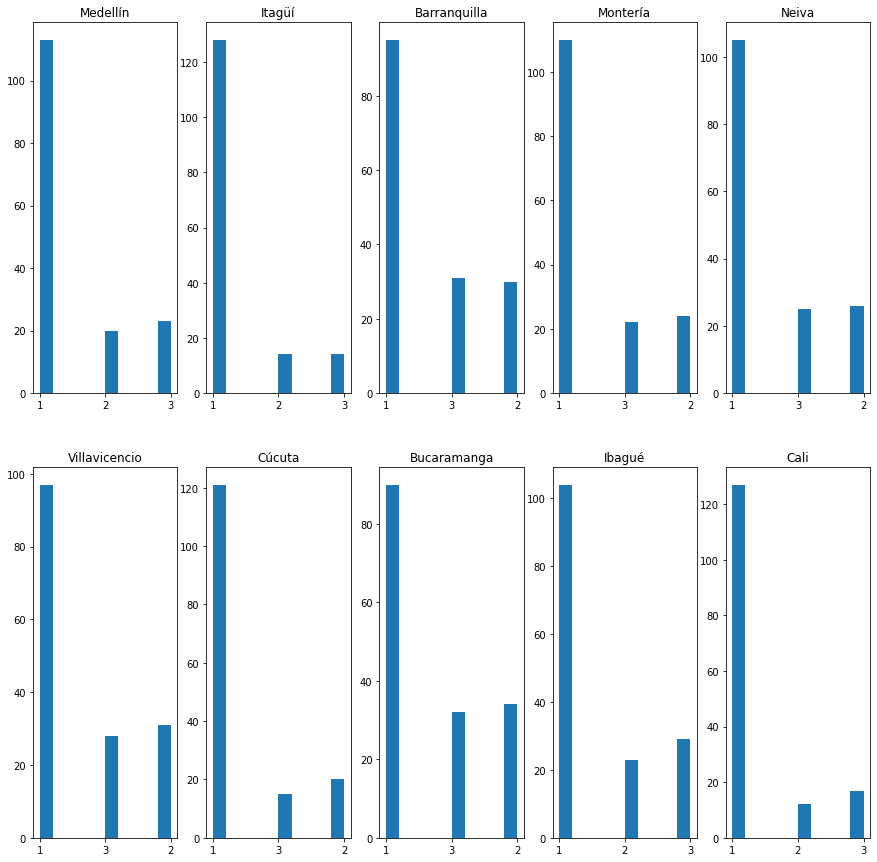

In [50]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
#fig, (ax1, ax2) = plt.subplots(1, 2)

j=1
k=156
count_stable=0
count_increased=0
count_decreased=0
for i in range(1,11):
    #plt.subplot(5, 2, i)
    ax = fig.add_subplot(2, 5, i)
    #ax.plot((merged_df["Cases"][j-1:k]))
    x=merged_df.index
    #ax.scatter(merged_df["Numeric Label"][j-1:k].index,merged_df["Numeric Label"][j-1:k])
    #plt.title(merged_df["Municipality"][j])
    #plt.show
    
#     if str(merged_df["Numeric Label"][j-1:k])=="1"
#         count_stable=count_stable+1
#     if str(merged_df["Numeric Label"][j-1:k])=="2"
#         count_increased=count_increased+1
#     if str(merged_df["Numeric Label"][j-1:k])=="3"
#         count_decreased=count_decreased+1

 
# Show plot
    ax.hist(merged_df["Numeric Label"][j-1:k])#, bins=[0.5,1.5,2.5,3.5])
    plt.title(merged_df["Municipality"][j])
    plt.show
    #ax.hist()
    j=j+156
    k=k+156
    
    